In [16]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture
import pandas as pd
import json
from math import sin, cos
import matplotlib.pylab as plt
import os
import cv2
from collections import namedtuple

Text(0.5, 1.0, 'Ground Truth Label')

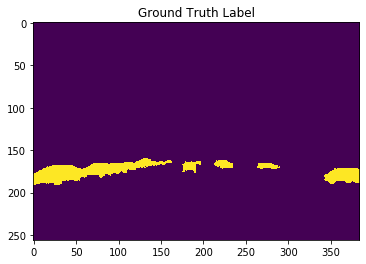

In [17]:
#load the generated mask
# load the image
image_path = 'Resized_Img_Mask/15/mask.png'
img_mask = cv2.imread(image_path)
img_mask = img_mask[:,:,0]
#print(img_mask.shape)
plt.imshow(img_mask)
plt.title('Ground Truth Label')
#print(img_mask.max(),img_mask.min())

In [26]:
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange','black','yellow','blue'])
def plot_results(X, Y_, means, covariances, index, title):
    #plt.figure(figsize=(20, 20))
    splot = plt.plot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances,color_iter)):
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 1], 256 - X[Y_ == i, 0], .8, color=color)

    plt.plot(np.array([0,384]), np.array([0,256]),'o', markerfacecolor = 'white', markeredgecolor = 'white')

    plt.title(title)

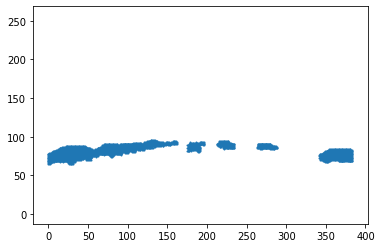

In [27]:
#Transfer the mask to the data for GMM
m,n = img_mask.shape
data = np.array([])
#print(m,n)
count = 0
for i in range(m):
    for j in range(n):
        if len(data) == 0:
            if img_mask[i,j] != 0:
                data =  np.array([[i,j]])
                
        else:
            if img_mask[i,j] != 0:
                data = np.concatenate((data, np.array([[i,j]])), axis=0)
                #print(data)
                
#print(data.shape)
#visualize the data
#plt.plot(data[:,1],256 - data[:,0],'.',markersize=2)
#plt.plot(np.array([0,384]), np.array([0,256]),'o', markerfacecolor = 'white', markeredgecolor = 'white')

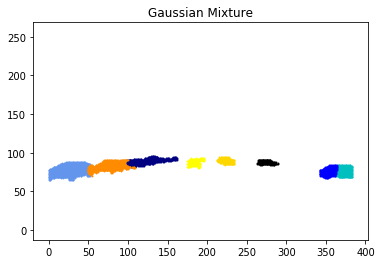

In [28]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=8, covariance_type='full').fit(data)
plot_results(data, gmm.predict(data), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

In [31]:
def get_extremes(image):
    top = np.unravel_index(image.argmax(), image.shape)
    corner = np.unravel_index(np.flip(image).argmax(), image.shape)
    bottom = tuple(s - c for c, s in zip(corner, image.shape))
    return (max(top[0] - 1, 1), max(bottom[0] - 1, 1))


def get_corners(image):
    extremes_row = get_extremes(image)
    extremes_col = get_extremes(np.rot90(image))
    return [
        extremes_row[0], extremes_row[1], -extremes_col[1], -extremes_col[0]
    ]

In [37]:
256* 384, 98304

(98304, 98304)

In [67]:
from sklearn.metrics import silhouette_score

def attempt(data, k):
    gmm = mixture.GaussianMixture(n_components=k, covariance_type='full').fit(data)
    labels = gmm.predict(data)
    return gmm.score(data), labels


def find_cluster(image, mask, max_clusters=12):
    scores = []
    labels = []

    x = np.linspace(0., 256, 256)
    y = np.linspace(0., 384, 384)
    # if we wanted to exclude the data they gave us 
    #      * np.reshape(m,(-1))
    print(image.shape, mask.shape, np.array(np.meshgrid(x, y)).T.reshape(-1,2).shape)
    stacked = np.hstack([np.reshape(image, (-1, 3)), np.array(np.meshgrid(x, y)).T.reshape(-1,2)])
    print(stacked.shape)
    data = stacked[np.reshape(mask[:,:,0] > 25, -1), :]

    for i in range(2, max_clusters + 1):
        print(i)
        score, l = attempt(data, i)
        labels.append(l)
        scores.append(score)

    k = np.argmax(scores)
    return k, labels[k], scores, data
    
dirs = "ramdisk/test_images/"
aa = os.listdir(dirs)

#import

for a in aa:
    image = cv2.imread("ramdisk/test_images/" + a)
    mask = cv2.imread("ramdisk/processed/" + a)
    K, labels, scores, data = find_cluster(image, mask)

    for k in range(K):
        # [x, y] in the image
        xy = data[labels == k, -2:]
        break
        corners = get_corners(mask)
        cropped = image
        if mask_only:
            prefix = "masked"
            cropped[~mask] = 0
        cropped = cropped[corners[0]:corners[1], corners[2]:corners[3]]
    break
    plt.imshow(cv2.flip(image, 1)[max(pts[1] - h, 0):pts[1] + h, max(pts[0] - w, 0):pts[0] + w])
    break
    cv2.imwrite("ramdisk/gmm/" + str(i) + a, cv2.flip(image, 1)[max(pts[1] - h, 0):pts[1] + h, max(pts[0] - w, 0):pts[0] + w])


(256, 384, 3) (256, 384, 3) (98304, 2)
(98304, 5)
2
3
4
5
6
7
8
9
10
11
12


([<matplotlib.lines.Line2D at 0x7feda389c650>], 9)

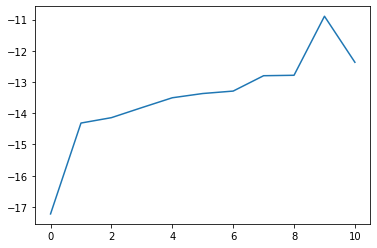

In [68]:
plt.plot(scores),K

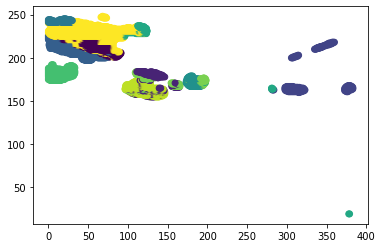

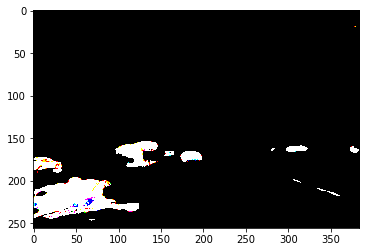

In [69]:
reconstruction = data[:, -2:].T
plt.scatter(reconstruction[1], reconstruction[0], c=labels)
plt.show()
plt.imshow(255*np.ones_like(mask) * (mask > 25))